# Lecture 10 - Data Wrangling

In this lecture we will explore cyclist count data from Brisbane in 2021. The data was gathered from the Brisbane City Council's open data portal.

In [1]:
# data processing with pandas

# importing data with read_csv
# inspect data (eg. info method)
# select data (loc, iloc, filtering)
# elementwise operations for computed columns (element-wise processes, apply method)
# aggregation (mean, std, agg)
# visualisation with plot method
# datetimes, categories

In [2]:
# standard imports for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the 'bike-ped-auto-counts-2021.csv' dataset. Ensure the Date column is imported in datetime format and is set as the index of the dataframe. Inspect the data to get a feel for the format.

In [3]:
# import and inspect data
auto_counts = pd.read_csv('Data/bike-ped-auto-counts-2021.csv', index_col='Date', parse_dates=True)
auto_counts

,"A001, Bicentennial Bikeway, Auchenflower _Pedestrian","A001, Bicentennial Bikeway, Auchenflower _Cyclist","A019, Bicentennial Bikeway, Milton _Pedestrian","A019, Bicentennial Bikeway, Milton _Cyclist","A002, Bishop Street, Kelvin Grove _Pedestrian","A002, Bishop Street, Kelvin Grove _Cyclist","A023, Botanic Gardens, City _Pedestrian","A023, Botanic Gardens, City _Cyclist","A003, Ekibin Park, Greenslopes _Pedestrian","A003, Ekibin Park, Greenslopes _Cyclist",...,"A028, Indooroopilly Riverwalk, Indooroopilly _Pedestrian","A028, Indooroopilly Riverwalk, Indooroopilly _Cyclist","A029, Lytton Road, East Brisbane _Cyclist","A200,_Cyclist City Link Cycleway (Edward St - Charlotte to Mary), City","A200,_Scooter City Link Cycleway (Edward St - Charlotte to Mary), City","A201,_Cyclist City Link Cycleway (Elizabeth St - Creek to Edward), City","A202,_Cyclist City Link Cycleway (Elizabeth St - Edward to Albert), City","A202,_Scooter City Link Cycleway (Elizabeth St - Edward to Albert), City","A203,_Cyclist City Link Cycleway (Victoria Bridge), City","A203,_Scooter City Link Cycleway (Victoria Bridge), City"
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1375.0,1718.0,1180.0,1780.0,1030,96,2955.0,1518.0,732,186.0,...,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,1668.0,2649.0,1445.0,2865.0,795,98,3267.0,2136.0,672,243.0,...,NaN,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,1939.0,3062.0,1251.0,3217.0,518,163,3172.0,2448.0,762,251.0,...,NaN,NaN,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,2007.0,2587.0,1218.0,2780.0,469,147,2583.0,1792.0,843,215.0,...,NaN,NaN,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,1570.0,3474.0,1080.0,3648.0,389,134,1959.0,2163.0,636,179.0,...,NaN,NaN,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,NaN,NaN,1304.0,2211.0,421,103,2798.0,1457.0,389,215.0,...,851.0,752.0,202,NaN,NaN,158.0,201.0,292.0,215.0,749.0
2021-12-28,NaN,NaN,1478.0,1273.0,414,89,3390.0,1210.0,348,205.0,...,796.0,503.0,147,NaN,NaN,214.0,308.0,481.0,265.0,975.0
2021-12-29,NaN,NaN,1530.0,2596.0,499,118,3519.0,1945.0,407,310.0,...,771.0,971.0,328,NaN,NaN,226.0,347.0,464.0,269.0,1032.0


In [4]:
auto_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 60 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   A001, Bicentennial Bikeway, Auchenflower  _Pedestrian                     287 non-null    float64
 1   A001, Bicentennial Bikeway, Auchenflower  _Cyclist                        289 non-null    float64
 2   A019, Bicentennial Bikeway, Milton  _Pedestrian                           317 non-null    float64
 3   A019, Bicentennial Bikeway, Milton  _Cyclist                              317 non-null    float64
 4   A002, Bishop Street, Kelvin Grove  _Pedestrian                            365 non-null    int64  
 5   A002, Bishop Street, Kelvin Grove  _Cyclist                               365 non-null    int64  
 6   A023, Botanic Gardens, City  _Pedestrian       

## Updating Data
There are lots of autocount locations in the data, so let's focus our analysis on a select few. Select the Maritime Museum and Annerley Rd locations. Rename the columns to ones that are more convenient to use. Add day and month columns to the data.

In [5]:
# updating data (adding, removing and renaming columns)


In [6]:
# selecting columns
auto_counts = auto_counts.iloc[:, 46:49]
auto_counts

,"A025, Maritime Museum, South Brisbane _Pedestrian","A025, Maritime Museum, South Brisbane _Cyclist","A026, Annerley Rd, South Brisbane _Cyclist"
Date,,,
2021-01-01,5710.0,1738.0,265
2021-01-02,6485.0,2538.0,462
2021-01-03,6525.0,2974.0,479
2021-01-04,4720.0,2865.0,538
2021-01-05,4690.0,3353.0,637
...,...,...,...
2021-12-27,4644.0,1970.0,351
2021-12-28,3073.0,910.0,224
2021-12-29,3875.0,1311.0,397


In [7]:
auto_counts.columns

Index(['A025, Maritime Museum, South Brisbane  _Pedestrian',
       'A025, Maritime Museum, South Brisbane  _Cyclist',
       'A026, Annerley Rd, South Brisbane  _Cyclist'],
      dtype='object')

In [11]:
column_renamer = {'A025, Maritime Museum, South Brisbane  _Pedestrian': 'Pedestrians',
                 'A025, Maritime Museum, South Brisbane  _Cyclist': 'Cyclists',
                 'A026, Annerley Rd, South Brisbane  _Cyclist': 'Cyclists_other'}

In [13]:
auto_counts = auto_counts.rename(columns=column_renamer)
auto_counts

,Pedestrians,Cyclists,Cyclists_other
Date,,,
2021-01-01,5710.0,1738.0,265
2021-01-02,6485.0,2538.0,462
2021-01-03,6525.0,2974.0,479
2021-01-04,4720.0,2865.0,538
2021-01-05,4690.0,3353.0,637
...,...,...,...
2021-12-27,4644.0,1970.0,351
2021-12-28,3073.0,910.0,224
2021-12-29,3875.0,1311.0,397


In [17]:
auto_counts['Day'] = auto_counts.index.day_of_year
auto_counts['Day_name'] = auto_counts.index.day_name()
auto_counts['Month'] = auto_counts.index.month
auto_counts

,Pedestrians,Cyclists,Cyclists_other,Day,Day_name,Month
Date,,,,,,
2021-01-01,5710.0,1738.0,265,1,Friday,1
2021-01-02,6485.0,2538.0,462,2,Saturday,1
2021-01-03,6525.0,2974.0,479,3,Sunday,1
2021-01-04,4720.0,2865.0,538,4,Monday,1
2021-01-05,4690.0,3353.0,637,5,Tuesday,1
...,...,...,...,...,...,...
2021-12-27,4644.0,1970.0,351,361,Monday,12
2021-12-28,3073.0,910.0,224,362,Tuesday,12
2021-12-29,3875.0,1311.0,397,363,Wednesday,12


## Cleaning Data
Now clean the data. This typically requires the following:
* Check whether data types are appropriate
* Check for missing values
* Inspect the data for incorrect values or outliers
* Do format checks where appropriate

In [18]:
# data types
auto_counts.dtypes

Pedestrians       float64
Cyclists          float64
Cyclists_other      int64
Day                 int32
Day_name           object
Month               int32
dtype: object

In [19]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

auto_counts['Day_name'] = pd.Categorical(auto_counts.Day_name, categories=day_names, ordered=True)
auto_counts.dtypes

Pedestrians        float64
Cyclists           float64
Cyclists_other       int64
Day                  int32
Day_name          category
Month                int32
dtype: object

In [21]:
# missing value count in each colummn
auto_counts.isna().sum()

Pedestrians       151
Cyclists          151
Cyclists_other      0
Day                 0
Day_name            0
Month               0
dtype: int64

In [22]:
# aggregates and plots still work with missing values
auto_counts.Cyclists.sum()

np.float64(590196.0)

In [23]:
auto_counts.Pedestrians.mean()

np.float64(4363.154205607477)

<Axes: xlabel='Date'>

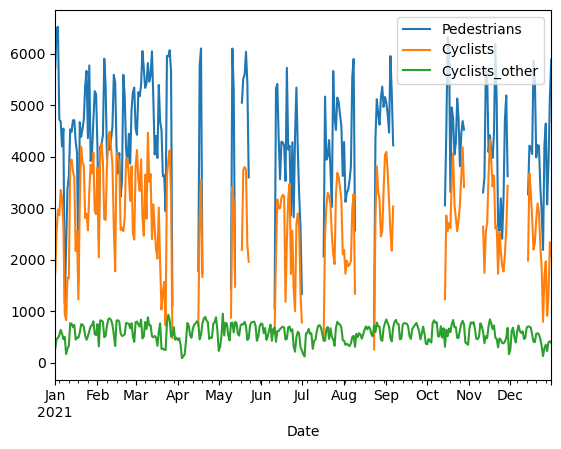

In [24]:
auto_counts.plot(y=['Pedestrians', 'Cyclists', 'Cyclists_other'])

In [26]:
# format check example
# no negative value check
auto_counts.min()

Pedestrians          0.0
Cyclists             0.0
Cyclists_other        89
Day                    1
Day_name          Monday
Month                  1
dtype: object

In [27]:
# outliers
auto_counts.max()

Pedestrians       6525.0
Cyclists          4486.0
Cyclists_other       953
Day                  365
Day_name          Sunday
Month                 12
dtype: object

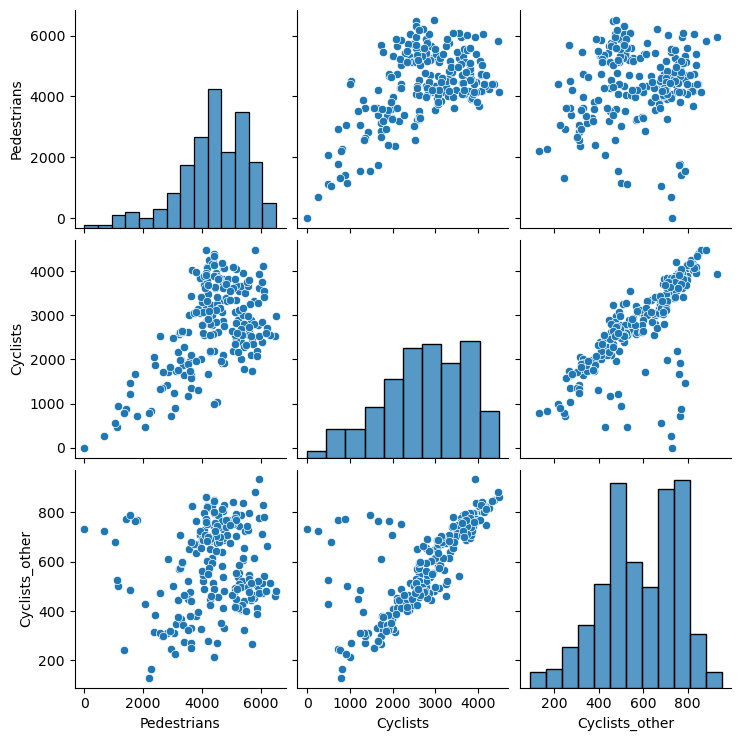

In [28]:
# outliers
sns.pairplot(auto_counts.iloc[:, :3])

In [ ]:
# outliers are present when looking at the cyclists vs. cyclist other plots

## Joining Data
Suppose we want to investigate the effect on climate (eg. temperatures, rainfall) on daily cyclist and pedestrian counts. We could import daily weather data 'BrisbaneDailyWeather.csv' which is gathered from the Bureau of Meteorology. We could then join the datasets together. We need to have an index or column (or set of columns) in common between the datasets in order to join them.

Different types of joins / merge
* inner (default)
* left (use keys from left frame)
* right (use keys from right frame)
* outer (use keys from both frames)

Join is used to join by index, whereas merge is used to join by columns.

Can use left_on and right_on arguments if the joining columns have different names.

In [32]:
# import the 'BrisbaneDailyWeather.csv' file, converting the Data column to datetime format and setting it as the index.
weather = pd.read_csv('Data/BrisbaneDailyWeather.csv', index_col='Date', parse_dates=True)
weather

,MinTemp,MaxTemp,Rainfall
Date,,,
2022-02-13,18.6,29.3,7.2
2022-02-12,20.4,28.9,0.0
2022-02-11,19.1,31.3,0.0
2022-02-10,19.4,31.2,0.0
2022-02-09,18.6,30.0,0.0
...,...,...,...
1999-12-15,17.0,27.0,0.0
1999-12-14,17.0,26.0,0.2
1999-12-13,19.0,24.0,0.8


In [33]:
# join the datasets together, and then determine how climate effects the counts
auto_counts.join(weather)

,Pedestrians,Cyclists,Cyclists_other,Day,Day_name,Month,MinTemp,MaxTemp,Rainfall
Date,,,,,,,,,
2021-01-01,5710.0,1738.0,265,1,Friday,1,21.7,29.4,2.4
2021-01-02,6485.0,2538.0,462,2,Saturday,1,21.5,29.9,1.8
2021-01-03,6525.0,2974.0,479,3,Sunday,1,22.2,30.1,0.0
2021-01-04,4720.0,2865.0,538,4,Monday,1,23.2,30.2,0.0
2021-01-05,4690.0,3353.0,637,5,Tuesday,1,23.4,32.8,1.0
...,...,...,...,...,...,...,...,...,...
2021-12-27,4644.0,1970.0,351,361,Monday,12,21.3,28.9,0.0
2021-12-28,3073.0,910.0,224,362,Tuesday,12,19.6,25.7,14.6
2021-12-29,3875.0,1311.0,397,363,Wednesday,12,19.1,26.9,0.0
